In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data setini çağırma

In [7]:
df_main=pd.read_excel("bhv.xlsx")
df=df_main.copy()

In [8]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,10560,20,3907,2,3699
1,Chikka Tirupathi,4 Bedroom,26000,50,1200,4,4615
2,Uttarahalli,3 BHK,14400,20,620,3,4305
3,Lingadheeranahalli,3 BHK,15210,30,950,3,6245
4,Kothanur,2 BHK,12000,20,510,2,4250


In [9]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,34530,40,2310,5,6689
13196,other,4 BHK,36000,50,4000,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,11410,20,600,2,5258
13198,Padmanabhanagar,4 BHK,46890,40,4880,4,10407
13199,Doddathoguru,1 BHK,5500,10,170,1,3090


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   location        13200 non-null  object
 1   size            13200 non-null  object
 2   total_sqft      13200 non-null  int64 
 3   bath            13200 non-null  int64 
 4   price           13200 non-null  int64 
 5   bhk             13200 non-null  int64 
 6   price_per_sqft  13200 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 722.0+ KB


Veri setimizin basit istatiksel değerlerini çağırıyoruz
total_sqft,price,price_per_sqft	değerlerinin standart sapmaları çok yüksek o yüzden bu verileri inceleyeceğiz

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13200.0,16347.692273,18255.450144,10.0,11000.0,12750.0,16800.0,687325.0
bath,13200.0,26.911364,13.389151,10.0,20.0,20.0,30.0,400.0
price,13200.0,1917.297424,3918.371718,80.0,560.0,880.0,1900.0,95815.0
bhk,13200.0,2.800833,1.292843,1.0,2.0,3.0,3.0,43.0
price_per_sqft,13200.0,7920.336742,106727.160328,267.0,4267.0,5438.0,7317.0,12000000.0


Grafiklerden de gözüktüğü üzere çok iyi veri değiller

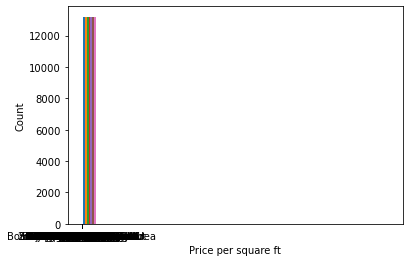

In [12]:
plt.hist(df, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

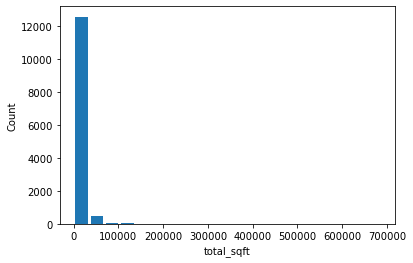

In [13]:
plt.hist(df.total_sqft, bins=20, rwidth=0.8)
plt.xlabel('total_sqft')
plt.ylabel('Count')
plt.show()

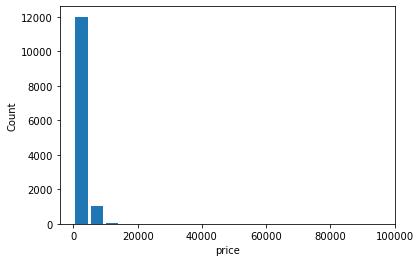

In [14]:
plt.hist(df.price, bins=20, rwidth=0.8)
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


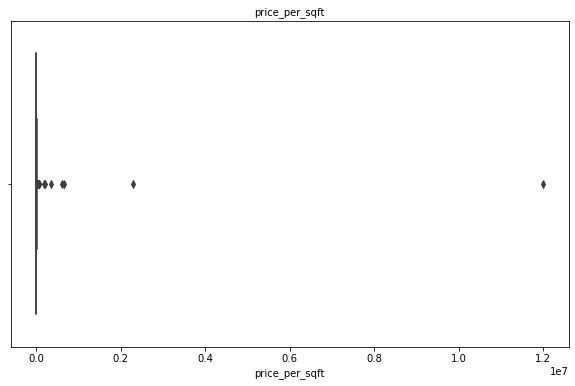

In [15]:
plt.figure(figsize = (10,6))
sns.boxplot(df.price_per_sqft)
plt.title('price_per_sqft',size=10)
plt.show()

Bu grafikleri düzeltme zamanı 😎

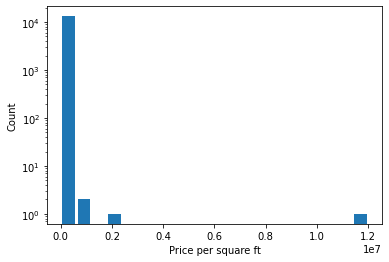

In [16]:
#Above chart confirms our understanding that this dataset has some bad outliers.
#Because we see only one bar with more than 12000 data points but
#on the right hand side there are data points that have higher value for price per sqft but
#count of these data points is very tiny compared to 12000 hence we can hardly see any bar
#Using log scale can make visualization little better
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [17]:
#datanın %99,9. ve %0,01.i değerlerini alıp bunları alt ve üst sınır belirliyoruz
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [18]:
#28 değer silindi
df = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df.shape

(13172, 7)

In [19]:
#Now remove outliers using 4 standard deviation
#ortlamadan 4 standart sapma kadar uzakta olan değerler üst limit ve alt limit olarak belirlendi
max_limit = df.price_per_sqft.mean() + 4*df.price_per_sqft.std()
min_limit = df.price_per_sqft.mean() - 4*df.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [20]:
#125 veri daha silindi
df = df[(df.price_per_sqft>min_limit) & (df.price_per_sqft<max_limit)]
df.shape

(13047, 7)

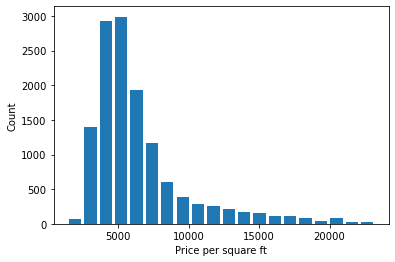

In [21]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


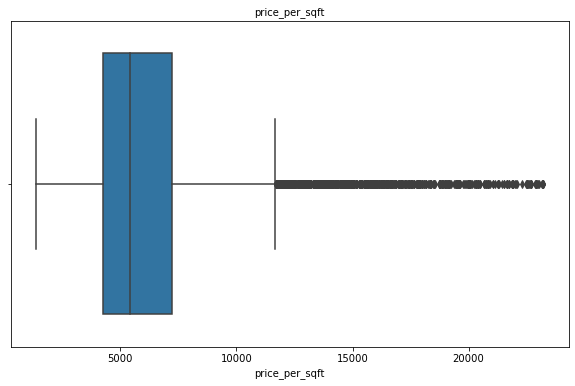

In [22]:
plt.figure(figsize = (10,6))
sns.boxplot(df.price_per_sqft)
plt.title('price_per_sqft',size=10)
plt.show()

2. grafiği düzeltme

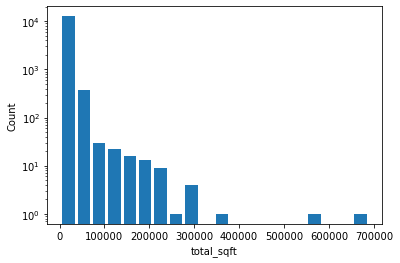

In [23]:
#Above chart confirms our understanding that this dataset has some bad outliers.
#Because we see only one bar with more than 12000 data points but
#on the right hand side there are data points that have higher value for price per sqft but
#count of these data points is very tiny compared to 12000 hence we can hardly see any bar
#Using log scale can make visualization little better
plt.hist(df.total_sqft, bins=20, rwidth=0.8)
plt.xlabel('total_sqft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [24]:
#datanın %99,9. ve %0,01.i değerlerini alıp bunları alt ve üst sınır belirliyoruz
lower_limit, upper_limit = df.total_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(3606.9, 211175.676000004)

In [25]:
#30 küsür değer silindi
df = df[(df.total_sqft<upper_limit) & (df.total_sqft>lower_limit)]
df.shape

(13019, 7)

In [26]:
#z score= (x-x.mean)/standart sapma
df['zscore'] = (df.total_sqft-df.total_sqft.mean())/df.total_sqft.std()
df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5569,KR Puram,6 Bedroom,20000,60,850,6,4250,0.347721
9714,other,2 BHK,12250,20,480,2,3918,-0.287222
8019,other,8 Bedroom,18500,120,3000,8,16216,0.224829
1974,Ananth Nagar,1 BHK,5000,20,140,1,2800,-0.881200
5150,Sultan Palaya,2 BHK,9000,20,450,2,5000,-0.553488


In [27]:
#100küsür veri silindi
df = df[(df.zscore>-4)&(df.zscore<4)]
df.shape

(12921, 8)

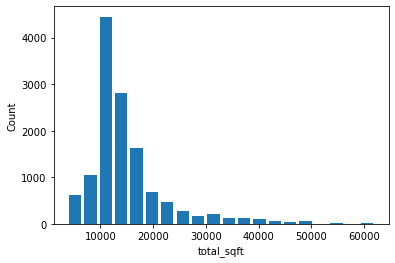

In [28]:
plt.hist(df.total_sqft, bins=20, rwidth=0.8)
plt.xlabel('total_sqft')
plt.ylabel('Count')
plt.show()

3.grafik

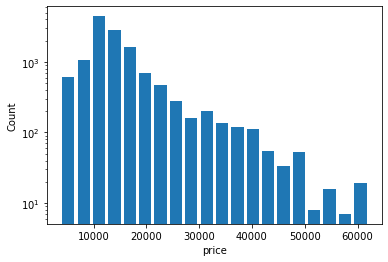

In [29]:
#Above chart confirms our understanding that this dataset has some bad outliers.
#Because we see only one bar with more than 12000 data points but
#on the right hand side there are data points that have higher value for price per sqft but
#count of these data points is very tiny compared to 12000 hence we can hardly see any bar
#Using log scale can make visualization little better
plt.hist(df.total_sqft, bins=20, rwidth=0.8)
plt.xlabel('price')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [30]:
#datanın %99,9. ve %0,01.i değerlerini alıp bunları alt ve üst sınır belirliyoruz
lower_limit, upper_limit = df.price.quantile([0.001, 0.999])
lower_limit, upper_limit

(120.0, 60134.20000000435)

In [31]:
#100küsür değer silindi
df = df[(df.price<upper_limit) & (df.price>lower_limit)]
df.shape

(12892, 8)

In [32]:
#z score= (x-x.mean)/standart sapma
df['zscore'] = (df.price-df.price.mean())/df.price.std()
df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
635,Chikkalasandra,2 BHK,8750,20,528,2,6034,-0.426606
6851,Sonnenahalli,3 BHK,13100,20,460,3,3511,-0.450304
1003,Chandapura,2 Bedroom,14000,20,600,2,4285,-0.401514
4012,EPIP Zone,2 BHK,12800,20,690,2,5390,-0.370149
10209,Doddaballapur,3 Bedroom,24400,30,1420,3,5819,-0.115746


In [33]:
#40küsür veri silindi
df = df[(df.zscore>-4)&(df.zscore<4)]
df.shape

(12851, 8)

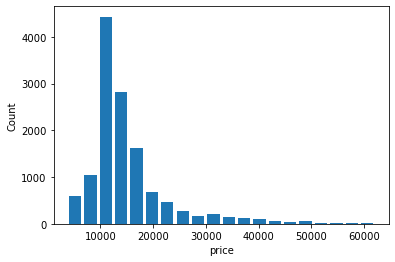

In [34]:
plt.hist(df.total_sqft, bins=20, rwidth=0.8)
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

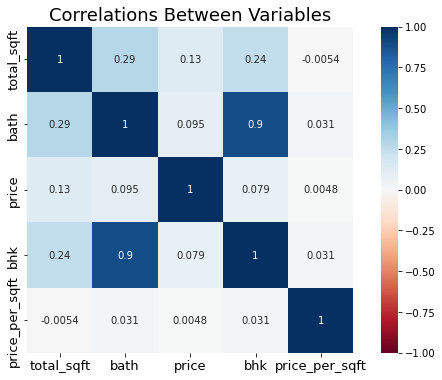

In [35]:
plt.figure(figsize = (10,6))
sns.heatmap(df_main.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

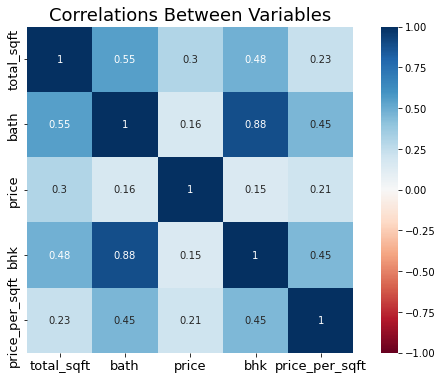

In [36]:
df.drop(["zscore"],axis=1,inplace=True)
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,12851.0,15011.008482,7523.553465,3750.0,11000.0,12700.0,16550.0,62000.0
bath,12851.0,26.579255,12.287174,10.0,20.0,20.0,30.0,180.0
price,12851.0,1632.808886,1824.099844,125.0,550.0,850.0,1780.0,12000.0
bhk,12851.0,2.772236,1.178812,1.0,2.0,3.0,3.0,18.0
price_per_sqft,12851.0,6440.115166,3461.609956,1379.0,4259.0,5416.0,7214.0,23214.0


In [43]:
df.drop(["location"],axis=1,inplace=True)

In [47]:
df.drop(["size"],axis=1,inplace=True)

In [48]:
import tensorflow as tf
#model oluşturma
from tensorflow.keras.models import Sequential
#model içine katmanları hazırlama 
from tensorflow.keras.layers import Dense

In [49]:
#veriyi test/train olarak ikiye ayırma
from sklearn.model_selection import train_test_split
#fiyat=y bözellik=x bözellik2=x
#y--> label(gitmemiz gerken özellik)
#x-->feature (özelliklerimiz)
y=df["price_per_sqft"].values #numpy diziye çevirdik
x=df.drop(["price_per_sqft"],axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [50]:
#Scailing (boyutlandırma)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
model=Sequential()
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
#final output
model.add(Dense(1))
#birleştirici #adam gibi olan şeyler 
model.compile(optimizer='rmsprop',loss="mse")

In [55]:
earlyStopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [56]:
model.fit(x=x_train,y=y_train,epochs=300,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/300
270/270 [==============================] - 1s 3ms/step - loss: 52871368.0000 - val_loss: 49202000.0000
Epoch 2/300
270/270 [==============================] - 1s 2ms/step - loss: 33780108.0000 - val_loss: 11675305.0000
Epoch 3/300
270/270 [==============================] - 1s 2ms/step - loss: 10036624.0000 - val_loss: 9701796.0000
Epoch 4/300
270/270 [==============================] - 1s 2ms/step - loss: 9818216.0000 - val_loss: 9589437.0000
Epoch 5/300
270/270 [==============================] - 1s 2ms/step - loss: 9717592.0000 - val_loss: 9478056.0000
Epoch 6/300
270/270 [==============================] - 1s 2ms/step - loss: 9632786.0000 - val_loss: 9386832.0000
Epoch 7/300
270/270 [==============================] - 1s 2ms/step - loss: 9558120.0000 - val_loss: 9328678.0000
Epoch 8/300
270/270 [==============================] - 1s 2ms/step - loss: 9496020.0000 - val_loss: 9274153.0000
Epoch 9/300
270/270 [==============================] - 1s 2ms/step - loss: 9438056.0000 - v

In [57]:
modelKaybi=pd.DataFrame(model.history.history)

<AxesSubplot:>

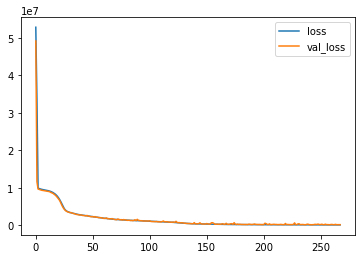

In [58]:
modelKaybi.plot()

In [59]:
#train ve test verilerinin loss karşılaştırmaları
trainlose=model.evaluate(x_train,y_train)
testloss=model.evaluate(x_test,y_test)
#model değerlendirmesi
test_Tahmin=model.predict(x_test)

133/133 [==============================] - 0s 935us/step - loss: 191150.4688


In [60]:
testDataframe_x=pd.DataFrame(test_Tahmin,columns=["Makine Tahmini"])

In [61]:
testDataframe_y=pd.DataFrame(y_test,columns=["Gerçek Fiyat"])

In [62]:
karsilastirmaDF=pd.concat([testDataframe_x,testDataframe_y],axis=1)
karsilastirmaDF

,Makine Tahmini,Gerçek Fiyat
0,5449.191895,5649
1,3637.956787,3661
2,8149.742676,8250
3,3871.180664,3936
4,5091.721191,4998
...,...,...
4236,8965.579102,9000
4237,7140.872070,7213
4238,4025.745361,4087
4239,3720.611084,3861


<AxesSubplot:xlabel='Makine Tahmini', ylabel='Gerçek Fiyat'>

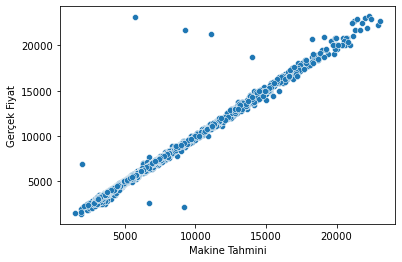

In [64]:
sns.scatterplot(x="Makine Tahmini",y="Gerçek Fiyat",data=karsilastirmaDF)

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
tahminDizisi= model.predict(x_test)
#+- 126 tahmin ediyor
mean_absolute_error(y_test,tahminDizisi)

126.51285482998924